# A Data-Driven Approach to Predict the Success of Bank Telemarketing: Decision Support Systems

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution, which is the case of a typical business problem.. The original article can be found at http://www.sciencedirect.com/science/article/pii/S016792361400061X . 

The dataset is available for download at : https://archive.ics.uci.edu/ml/datasets/bank+marketing .

The analysis is done in Python and different machine learning algorithms are considered and accuracy metrics evaluated. The classification goal is to predict if the client will subscribe a term deposit (variable y, no/yes). A total of 20 input features are considered, which can be categorized as follows: 

#### Bank client data
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
#### Related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric).
#### Other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

Begin by importing the libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline 

In [2]:
#Importing the dataset
data = pd.read_csv('bank-additional-full.csv',sep =';')

Now preview the dataset

In [3]:
data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

The dataset has no NA's and null values. Also we have a lot of categorical features to be taken into consideration

Lets analyze each of the 20 input features, their distribution and relevance if any.

## Feature Engineering 

First, lets study the distribution of the output variable classes. The plot is made by making use of `FacetGird()` and the `countplot()` from `seaborn`

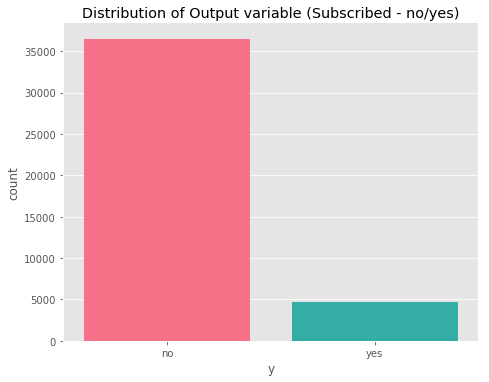

In [5]:
sns.set_palette("husl",2)
sns.FacetGrid(data, hue="y",size=5,aspect = 1.3)
sns.countplot(x="y", data=data,saturation=1).set_title("Distribution of Output variable (Subscribed - no/yes)")

Observe that the dataset is highly skewed towards the 'no' class. So we need to do some balancing of classes in our machine learning algorithms.

## Bank client basic data :

### `age` variable

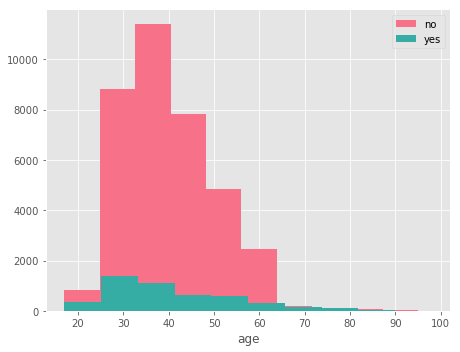

In [6]:
g = sns.FacetGrid(data, hue="y", size=5, aspect = 1.3)
g.map(plt.hist, "age")
plt.legend()

The skewed trend is reflected in the `age` variable as well, with the higher ratio in the 'no' class. Also, we observe that a higher number of people has fallen in the age group from 25 to 45. So, the term deposit scheme by the Bank is popular among the young age group. This would mean `age` variable is important for learning.

### `job` , `education` and `marital` variables

`job` would mean type of job, a categorical variable with the categories : 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown'

`education` level falls under the categories : 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'

`marital` status has the categories :'divorced','married','single','unknown'

Lets combine their distributions

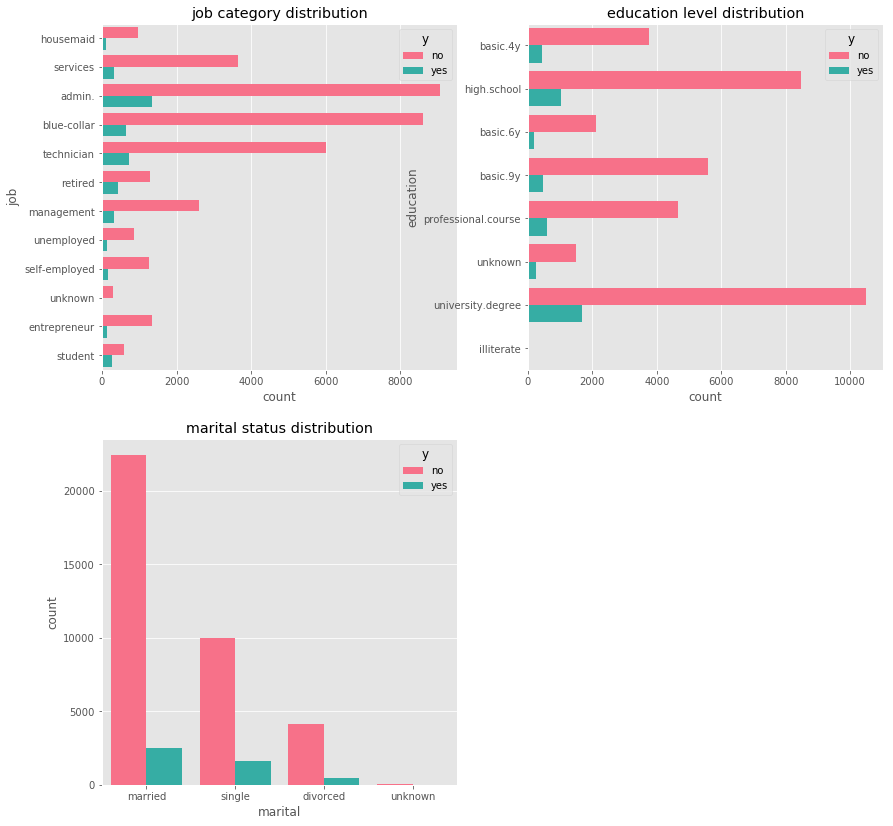

In [7]:
# Create a figure instance, and the subplots
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

sns.set_palette("husl",2)
sns.countplot(y="job", hue="y", data=data,ax=ax1,saturation=1).set_title('job category distribution')
sns.countplot(y="education", hue="y", data=data,ax=ax2,saturation=1).set_title('education level distribution')
sns.countplot(x="marital", hue="y", data=data,ax=ax3,saturation=1).set_title('marital status distribution')

As for the `job` categories, the deposit scheme seems to be more popular among those who do 'admin', 'blue-collar' type jobs and 'technicians'. In terms of education status, those with the 'university.degree' top the list followed by 'high.school'. 

To conlude, lets ascertain that the scheme can do more with young-aged people who have some basic education and have families.

### `default`, `housing`, and `loan` variables

Lets now analyse how good the people are in their terms with the Bank.

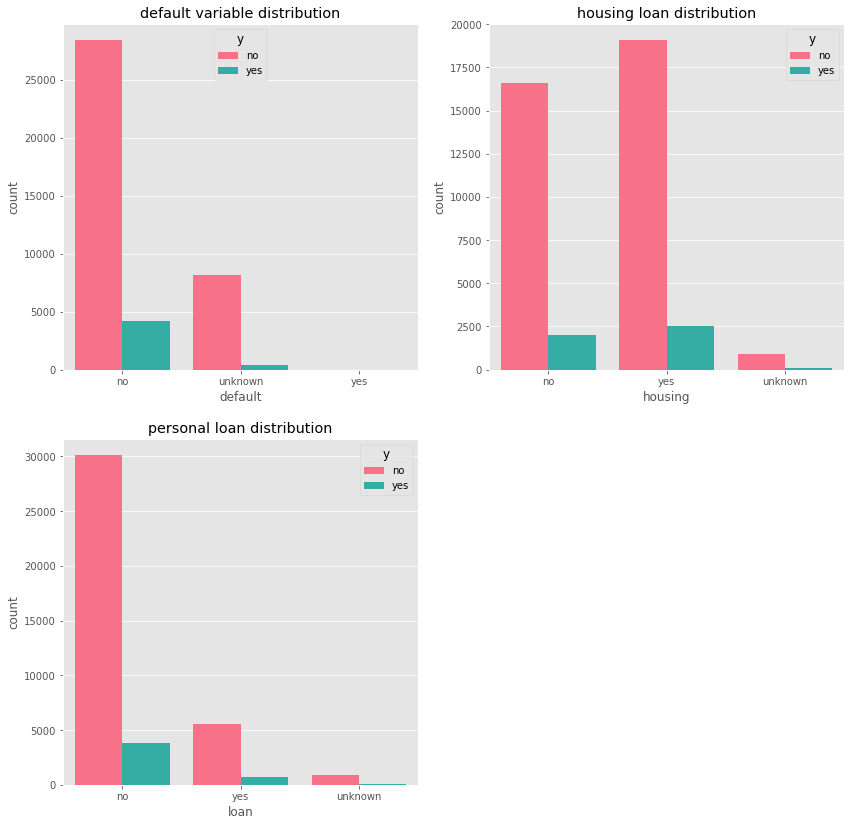

In [8]:
# Create a figure instance, and the four subplots
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1);ax2 = fig.add_subplot(2,2,2);ax3 = fig.add_subplot(2,2,3)

sns.countplot(x="default", hue="y", data=data,ax=ax1,saturation=1).set_title('default variable distribution')
sns.countplot(x="housing", hue="y", data=data,ax=ax2,saturation=1).set_title('housing loan distribution')
sns.countplot(x="loan", hue="y", data=data,ax=ax3,saturation=1).set_title('personal loan distribution')

Clients who have known `default` status have more responses, where as those with and without `housing loan` have equally good responses to the term deposit, with a slightly higher subscriptions among those who have a housing loan. `personal loan` also do have some varying patterns, so all three variables may be important for machine learning. 

## Related with the last contact of the current campaign

Lets analyse the mode as well as the time of contact for the current campaign.

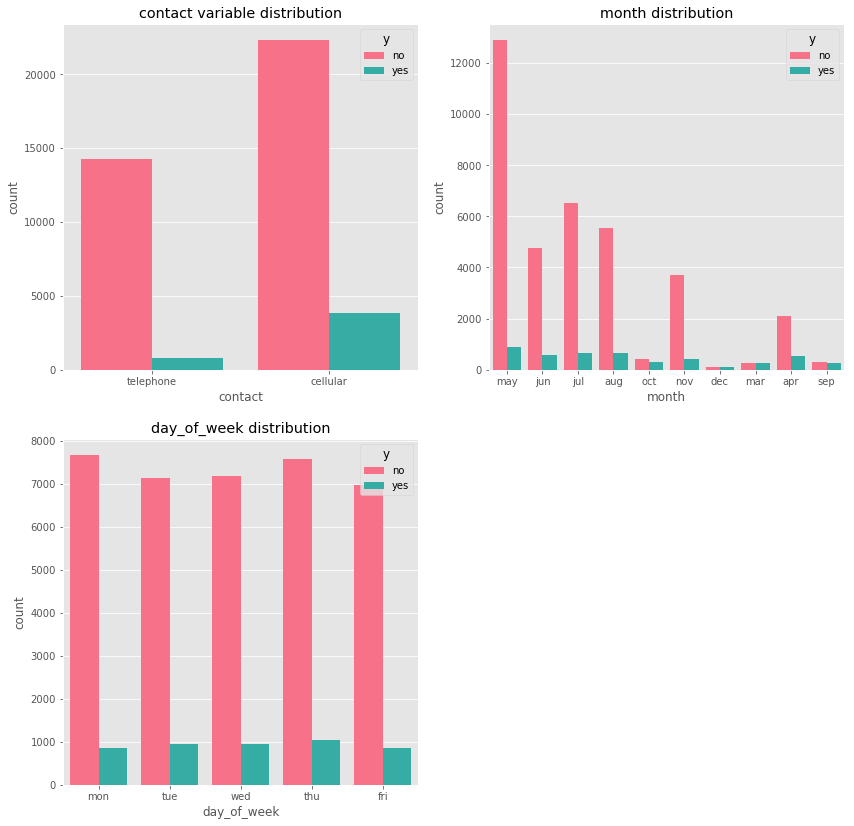

In [9]:
# Create a figure instance, and the four subplots
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1);ax2 = fig.add_subplot(2,2,2);ax3 = fig.add_subplot(2,2,3)

sns.countplot(x="contact", hue="y", data=data,ax=ax1,saturation=1).set_title('contact variable distribution')
sns.countplot(x="month", hue="y", data=data,ax=ax2,saturation=1).set_title('month distribution')
sns.countplot(x="day_of_week", hue="y", data=data,ax=ax3,saturation=1).set_title('day_of_week distribution')

Observe that those who were contacted over `cellular` has more responses for obvious reasons. Clients conisder more about the investments in summer months i.e April to Aug and less in winter. Observe that the `day_of_week` feature does not have much of a story to tell, i.e there are no varying patterns. Instances have pretty much the same values irrespective of the days in the week. So this variable may be excluded.

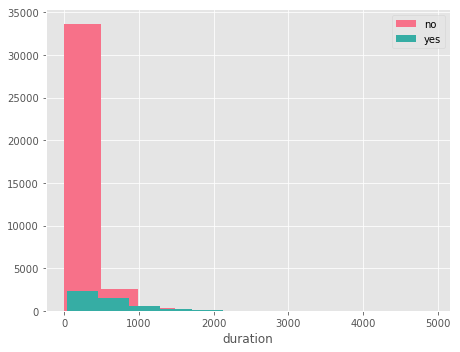

In [10]:
g = sns.FacetGrid(data, hue="y", size=5, aspect = 1.3)
g.map(plt.hist, "duration")
plt.legend()

`duration` attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

## Other attributes

`campaign` denotes number of contacts performed during this campaign and for this client, including last contact.

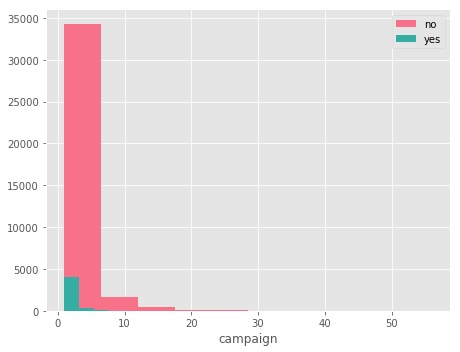

In [11]:
g = sns.FacetGrid(data, hue="y", size=5, aspect = 1.3)
g.map(plt.hist, "campaign") 
plt.legend()

The variation follows pretty much the same general trend, skewed towards 'no'.

Now, `pdays` gives the number of days that passed by after the client was last contacted from a previous campaign. 999 means client was not previously contacted.

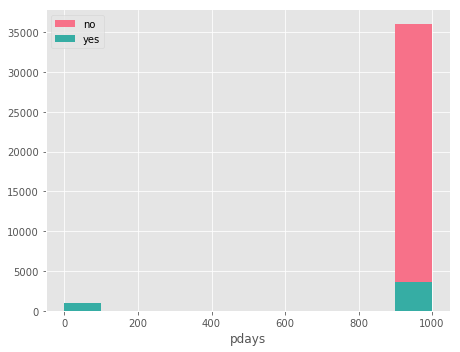

In [12]:
g = sns.FacetGrid(data, hue="y", size=5, aspect = 1.3)
g.map(plt.hist, "pdays") 
plt.legend()

`previous` denotes number of contacts performed during the previous campaign and for this client.

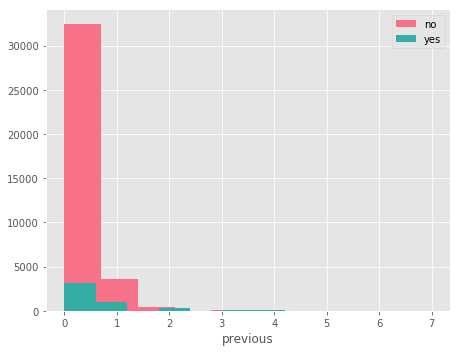

In [13]:
g = sns.FacetGrid(data, hue="y", size=5, aspect = 1.3)
g.map(plt.hist, "previous")
plt.legend()

`poutcome` denotes the outcome of the previous marketing campaign.

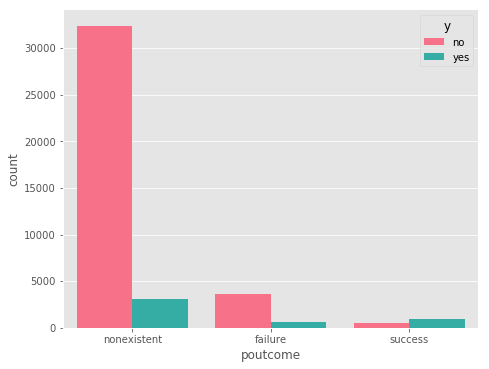

In [14]:
sns.FacetGrid(data, hue="y", size=5, aspect = 1.3)
sns.countplot(x="poutcome", hue="y",data=data, saturation=1)

All the above variables are quite intutive in determining the subscription of the term deposit. So lets include them in the model.

## Social and economic context attributes

Lets make a pairplot of the the social and economic attributes

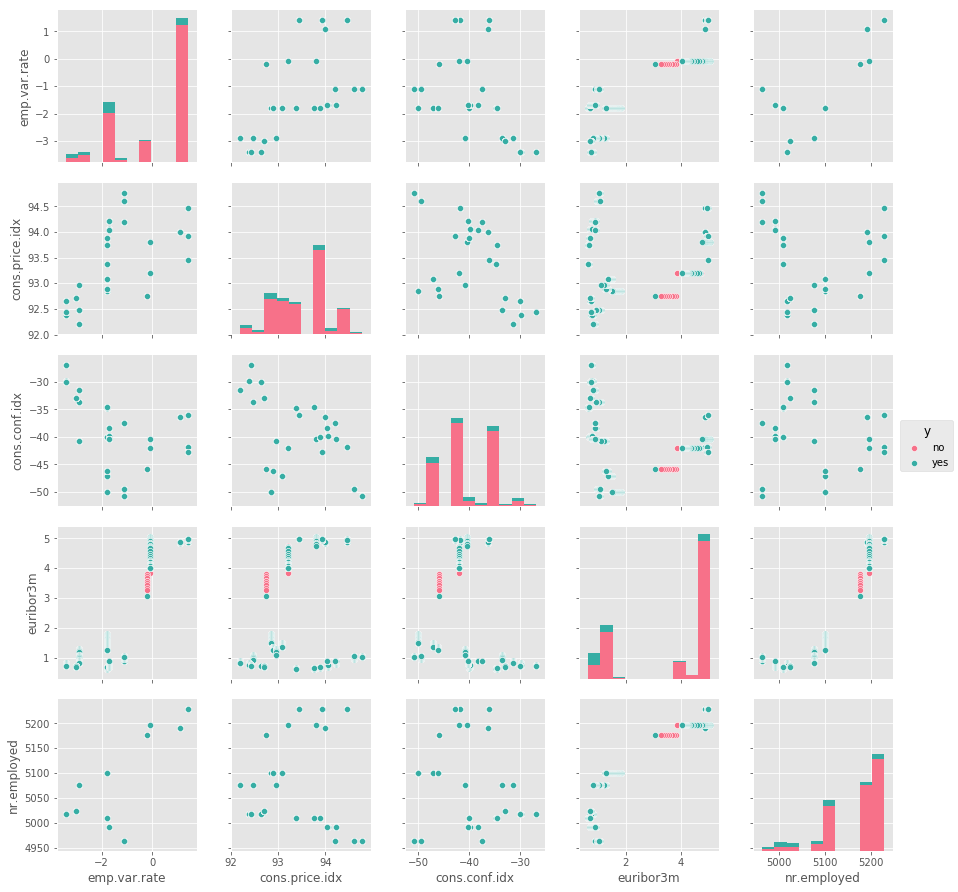

In [15]:
sns.pairplot(data, hue='y',vars =['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],palette="husl")

## Encoding categorical data

Lets inspect the categorical variables (dtype :'object)

In [16]:
categ_data = data.select_dtypes(include=['object']).copy()
categ_data.head(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


Observe that there are 11 categorical variables including the ouput variable. Lets encode them into dummy variables using `get_dummies` in Pandas.

In [17]:
data = pd.get_dummies(data, columns=["job", "marital", "education", "default", "contact",
                                     "housing", "loan","month","poutcome"])

In [18]:
data.head(10)

,age,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,mon,261,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
1,57,mon,149,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
2,37,mon,226,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
3,40,mon,151,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
4,56,mon,307,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
5,45,mon,198,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
6,59,mon,139,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
7,41,mon,217,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
8,24,mon,380,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
9,25,mon,50,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
age                              41188 non-null int64
day_of_week                      41188 non-null object
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null object
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management 

The dataset now has a total of 60 features. To prevent dummy variable class lets drop the redundant classes from all the categorical features. Also, we dont include `day_of_week` and `duration` in the model.

In [20]:
X = data.drop(['day_of_week','duration','y','job_unknown','marital_unknown',
               'education_illiterate','default_yes','housing_unknown','loan_unknown',
               'month_dec','poutcome_nonexistent'], axis = 1)
y = data['y']

## Splitting into training and test set

Lets do the split in the ratio 80:20

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

This is done to scale off variables for the Dimensionality Reduction coming up.

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Dimensionality Reduction : Principal Component Analysis

After encoding the categorical variables, we now have a total of 59 input features and it would be cumbersome to include all of them in the model. Also, choosing relevant features by feature extraction techniques with categorical features is not meaningful. So lets resort to Dimensionality Reduction using PCA and extract two most important cmponents.

In [23]:
# Applying PCA to reduce the number of features
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [24]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([ 0.11230071,  0.05882852])

As above, the two principal components can explain 11% and 5 % of the variations respectively. Now move on to Machine Learning

## Machine Learning : Model Building

Lets build three classification models. As mentioned before, the dataset is highly skewed, so what we do is, we will choose `class_weights` parameter to be balanced. This may be the simplest way to deal with skewed datasets. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

### Logistic Regression

In [25]:
# Fit a Logistic Regression for classification
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(class_weight = 'balanced',random_state = 0)
classifier1.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier1.predict(X_test)

# Printing the confusion matrix
from sklearn.metrics import confusion_matrix
cm_logit = confusion_matrix(y_test, y_pred)
cm_logit

array([[5159, 2160],
       [ 276,  643]])

Lets calculate the accuracy metric for Logistic Regression

In [26]:
classifier1.score(X_test,y_test)

0.70429715950473415

### Support Vector Machines

In [27]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0, class_weight='balanced')
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred)
cm_svm

array([[5137, 2182],
       [ 274,  645]])

Lets calculate the accuracy metric for SVM (Linear)

In [29]:
classifier2.score(X_test,y_test)

0.70186938577324598

In [32]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf', random_state = 0,class_weight='balanced')
classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_KSVM = confusion_matrix(y_test, y_pred)
cm_KSVM

array([[5385, 1934],
       [ 304,  615]])

Lets calculate the accuracy metric for Kernel SVM

In [33]:
classifier3.score(X_test,y_test)

0.72833211944646759

### Ensemble methods

Now lets build Decision Tree Classifier and a boosted Random Forests Classifier and print the accuracy

In [34]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,class_weight = 'balanced')
classifier4.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier4.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtree = confusion_matrix(y_test, y_pred)
cm_dtree

array([[6630,  689],
       [ 663,  256]])

In [35]:
classifier4.score(X_test,y_test)

0.83588249575139595

In [36]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0,class_weight = 'balanced')
classifier5.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier5.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test, y_pred)
cm_RF

array([[7091,  228],
       [ 723,  196]])

In [37]:
classifier5.score(X_test,y_test)

0.88455935906773486

## Concluding Remarks

1. The bank's data for predicting the success of marketing campaign for the 'term deposit' has been analysed. Its been observed that the scheme can potentially find more customers among the younger age group, than the retired folks.

2. Also, the people who do 'admin' and 'blue-collar' type of jobs tend to say 'yes' to the scheme, than the high-salaried population. So the Bank can make the scheme adopt changes that may attract these categories.

3. To reduce the number of features, Principal Component Analysis has been used and first two components could explain the variance in the data by 16% in total.

4. Logistic Regression gives a prediction accuracy of 70.42% on the test set where as that of Support Vector Machine with Kernel is 72.8%

5. Ensemble based methods like Decision trees gives off a prediction accuracy of 83.5% while Random Forests could make it upto 88.45%.